# Neural & Behavioral Modeling - Week 15 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
import random
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np

## 1 One Spiking Neuron

### 1.0 Generating an exponential distribution from uniform distribution

Given that y is an uniform distribution and the CDF of an <a href="https://en.wikipedia.org/wiki/Exponential_distribution">exponential distribution</a> is $1-e^{-\lambda x}$, by <a href="https://en.wikipedia.org/wiki/Inverse_transform_sampling">inverse transform sampling</a> we obtain an equality that $1-e^{-\lambda x}=y \implies x=-ln(1-y)/\lambda$

<img src=https://upload.wikimedia.org/wikipedia/commons/5/5a/Inverse_transformation_method_for_exponential_distribution.jpg width=50%>


### 1.1 Spiking Variability

Spiking variability can be measured by <a href="https://en.wikipedia.org/wiki/Coefficient_of_variation">Coefficient of Variation</a>, namely Cv=$\sigma/\mu$. 

Note that interspike intervals are usually well described by <a href="https://en.wikipedia.org/wiki/Exponential_distribution">exponential distributions</a>, whose $C_v=\sigma/\mu=\lambda^{-1}/\lambda^{-1}=1$.

<table><tr>
<td><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Exponential_probability_density.svg/650px-Exponential_probability_density.svg.png width=45%></td>
<td><img src=https://www.causeweb.org/cause/archive/repository/statjava/images/exp_table.png></tr>
</tr></table>

0.05058858080118601 0.9994252484154232


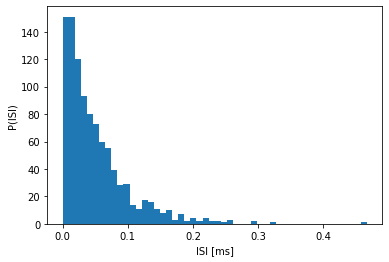

In [2]:
lmbda=20 # Firing rate [Hz]            
Ns=1000 # # of spikes                     
#isi=np.random.exponential(scale=1/lmbda,size=1000)
isi=-np.log(1-np.random.rand(Ns))/lmbda # generating an exponential distribution from uniform distribution
hist(isi,bins=50)
cv=np.std(isi)/np.mean(isi)
print(np.mean(isi),cv)
xlabel('ISI [ms]');
ylabel('P(ISI)');

## 2 Two Spiking Neurons

### 2.1 Two independent I-F neurons

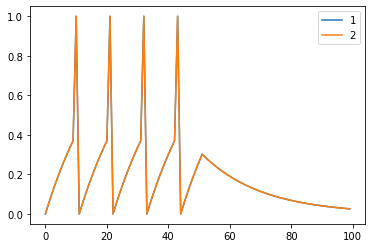

In [4]:
x=.5 # inputs to the two neurons
V=np.array([[0,0]]) # initial values of the two neurons
A=np.array([[.5,0],[0,.5]]) # Amm=decay of m; Try [[.1,0],[0,1]]
E=np.array([[0,0],[0,0]]) # Emn=excitation from n to m
I=np.array([[0,0],[0,0]]) # Imn=Inhibition from n to m
Vrst=0; Vthr=.4; Vspk=1; dt=0.1;
tspan=np.arange(0,10,dt)
for t in tspan:
    if t>5: x=0 # turn off inputs
    V1=V[-1] # the last element
    s=V1>Vthr 
    V2=s*Vrst+(1-s)*(V1+dt*(-A.dot(V1)+E.dot(V1)-I.dot(V1)+x)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.vstack([V,V2])
plot(V[:-1,:]); legend(['1','2']);

### 2.1 The effects of excitations

#### 2.1.1 Two recurrent neurons

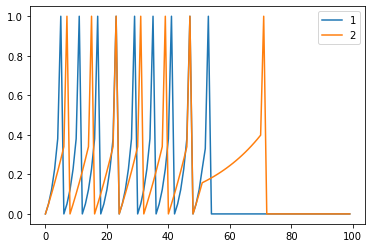

In [7]:
# Neuron 1 has a stronger self-excitation:
E=np.array([[5,0],[0,1]]) # Emn=excitation from n to m

x=.5 # inputs to the two neurons
V=np.array([[0,0]]) # initial values of the two neurons
A=np.array([[.5,0],[0,.5]]) # Amm=decay of m 
I=np.array([[0,0],[0,0]]) # Imn=Inhibition from n to m
Vrst=0; Vthr=.4; Vspk=1; dt=0.1;
tspan=np.arange(0,10,dt)
for t in tspan:
    if t>5: x=0 # turn off inputs 
    V1=V[-1] # the last element
    s=V1>Vthr 
    V2=s*Vrst+(1-s)*(V1+dt*(-A.dot(V1)+E.dot(V1)-I.dot(V1)+x)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.vstack([V,V2])
plot(V[:-1,:]); legend(['1','2']);

#### 2.1.2 Neuron 2 excites itself & Neuron 1

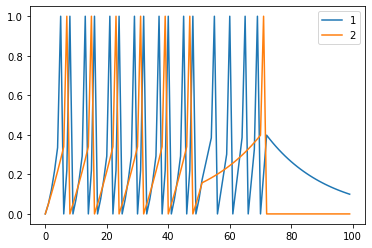

In [6]:
# Neuron 2 excites itself & neuron 1:
E=np.array([[0,5],[0,1]]) # Emn=excitation from n to m

x=.5 # inputs to the two neurons
V=np.array([[0,0]]) # initial values of the two neurons
A=np.array([[.5,0],[0,.5]]) # Amm=decay of m 
I=np.array([[0,0],[0,0]]) # Imn=Inhibition from n to m
Vrst=0; Vthr=.4; Vspk=1; dt=0.1;
tspan=np.arange(0,10,dt)
for t in tspan:
    if t>5: x=0 # turn off inputs 
    V1=V[-1] # the last element
    s=V1>Vthr 
    V2=s*Vrst+(1-s)*(V1+dt*(-A.dot(V1)+E.dot(V1)-I.dot(V1)+x)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.vstack([V,V2])
plot(V[:-1,:]); legend(['1','2']);

### 2.2 The effects of inhibtions

#### 2.2.1 Symmetric mutual inhibitions 

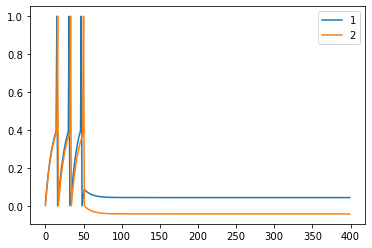

In [41]:
# Neuron 1 runs first:
V=np.array([[.01,0]]) # initial values of the two neurons
I=np.array([[0,.5],[.5,0]]) # Imn=Inhibition from n to m
x=.5 # inputs to the two neurons
A=np.array([[.5,0],[0,.5]]) # Amm=decay of m 
E=np.array([[0,0],[0,0]]) # Emn=excitation from n to m
Vrst=0; Vthr=.4; Vspk=1; dt=0.1;
tspan=np.arange(0,40,dt)
for t in tspan:
    if t>5: x=0 # try x=0.5
    V1=V[-1] # the last element
    s=V1>Vthr 
    V2=s*Vrst+(1-s)*(V1+dt*(-A.dot(V1)+E.dot(V1)-I.dot(V1)+x)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.vstack([V,V2])
plot(V[:-1,:]); legend(['1','2']);

#### 2.2.2 Assymmetric mutual inhibitions 

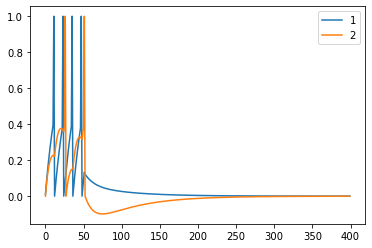

In [52]:
# Neuron 1 exertss a stronger inhibiton on neuron 2:
I=np.array([[0,.1],[1,0]]) # Imn=Inhibition from n to m
V=np.array([[0.01,0]]) # initial values of the two neurons

x=.5 # inputs to the two neurons
A=np.array([[.5,0],[0,.5]]) # Amm=decay of m 
E=np.array([[0,0],[0,0]]) # Emn=excitation from n to m
Vrst=0; Vthr=.4; Vspk=1; dt=0.1;
tspan=np.arange(0,40,dt)
for t in tspan:
    if t>5: x=0 # try x=0.5
    V1=V[-1] # the last element
    s=V1>Vthr 
    V2=s*Vrst+(1-s)*(V1+dt*(-A.dot(V1)+E.dot(V1)-I.dot(V1)+x)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.vstack([V,V2])
plot(V[:-1,:]); legend(['1','2']);

## 3 N Spiking Neurons

### 3.1 A pulse-coupled neural network of 800+200 Izhikevich neurons
<img src="https://www.izhikevich.org/publications/izhik.gif" width=75%>

<img src=https://d3i71xaburhd42.cloudfront.net/f6f274ce8fce7770f53920f9340aa7fa4bfd7df7/21-Figure8.15-1.png width=70%>

This is the code ported from <a href="https://www.izhikevich.org/publications/spikes.pdf">Izhikevich (2003)</a>:

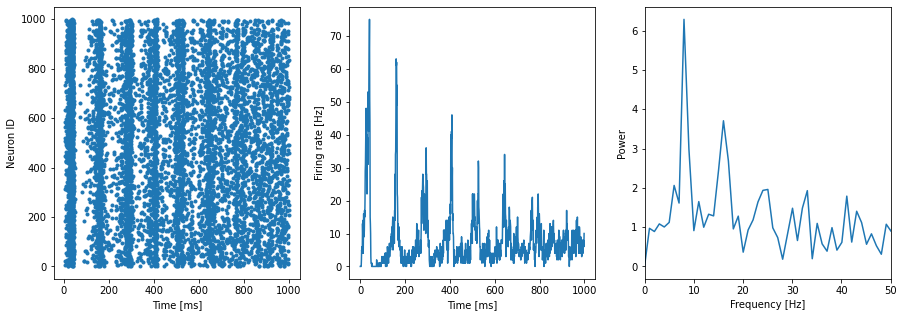

In [32]:
# Excitatory neurons                      Inhibitory neurons
Ne=800;                                   Ni=200;
re=np.random.rand(Ne);                    ri=np.random.rand(Ni); 
a=np.append(0.02*np.ones(Ne),             0.02+0.08*ri);
b=np.append(0.2*np.ones(Ne),              0.25-0.05*ri);
c=np.append(-65+15*re**2,                 -65*np.ones(Ni));
d=np.append(8-6*re**2,                    2*np.ones(Ni));
S=np.hstack([0.5*np.random.rand(Ne+Ni,Ne),-np.random.rand(Ne+Ni,Ni)]); # synaptic connection 

v=-65*np.ones(Ne+Ni)      # Initial values of v
u=b*v                     # Initial values of u
firings=np.array([])      # spike timings: [trial k, neuron that fire in trial k]

for t in range(1000):     # simulation of 1000 ms 
    I=np.append(5*np.random.randn(Ne),2*np.random.randn(Ni)) # thalamic input 
    fired=np.where(v>=30)[0] # indices of spikes
    if(fired.size>0):
        new_firings=np.hstack([np.repeat([[t]],fired.size,axis=0),np.array([fired]).T])
        firings=np.vstack([firings,new_firings]) if(firings.size>0) else new_firings
        v[fired]=c[fired]  
        u[fired]=u[fired]+d[fired]
        I=I+np.sum(S[:,fired],1)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    u=u+a*(b*v-u)   

figure(figsize=(15,5))

subplot(1,3,1); plot(firings[:,0],firings[:,1],'.'); xlabel('Time [ms]'); ylabel('Neuron ID');

# Visualizing firing rate:
rate=np.zeros(1000) # firing rate at each t
for t in range(1000):
    rate[t]=np.sum(firings[:,0]==t)
subplot(1,3,2); plot(rate); xlabel('Time [ms]'); ylabel('Firing rate [Hz]');

# Frequency analysis:
import scipy.fftpack
N=1000 # samples
Fs=1/1000 # sampling frequency (Hz)
yf=scipy.fftpack.fft(rate)
yf[0]=0; # remove the DC component
xf=np.linspace(0,1/(2*Fs),int(N/2))

subplot(1,3,3); plot(xf, 2/N*np.abs(yf[:int(N/2)])); xlabel('Frequency [Hz]'); ylabel('Power'); xlim([0,50]);

### 3.2 Synchronization of AdEx neurons

<table><tr>
<td><img src=https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/AdaptiveExponential_Init_burst.png width=90%></td>
<td><img src=http://www.digicortex.net/img/adex.png></td>
</tr></table>
Details are described in <a href="https://www.nature.com/articles/ncomms6512.pdf">this article</a>.

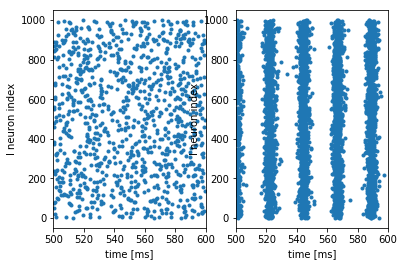

In [39]:
# Defining network model parameters:
vtE = 10;                   # Spiking threshold for excitatory neurons [mV]
vtI = 4;                    # Spiking threshold for inhibitory neurons [mV]
tau_vI = 10;                # Membrane capacitance for inhibitory neurons [pf]
tau_vE = 40;                # Membrane capacitance for excitatory neurons [pf]
tau_ad = 20;                # Time constant of inhibitory adaption variable [ms]
TsigI = 10;                 # Variance of current in the inhibitory neurons
TsigE = 12;                 # Variance of current in the excitatory neurons
tau_I = 10;                 # Time constant to filter the synaptic inputs [ms]
beta_adE = 0;               # No adaptation in the excitatory neurons
beta_adI = 4.5;             # Conductance of the adaptation variable variable of inhibitory neurons
alpha_adI = -2;             # Coupling of the adaptation variable variable of inhibitory neurons
alpha_adE = 0;              # No adaptation in the excitatory
GammaII = 15;               # I to I connectivity
GammaIE = -10;              # I to E connectivity
GammaEE = 15;               # E to E connectivity
GammaEI =15;                # E to I connectivity
TEmean = 0.5*vtE;           # Mean current to excitatory neurons

# Simulation parameters:
N = 5000;                   # Number of neurons in total
NE = int(0.8*N);                 # Number of excitatory neurons
NI = int(0.2*N);                 # Number of inhibitory neurons
dt = 0.01;                  # Simulation time bin [ms]
T = int(600/dt);                 # Simulation length [ms]

# If simulations with the aEIF neuron model:
Delta_T = 0.5;              # exponential parameter
refrac = 5/dt;              # refractory period [ms]
ref= refrac*np.zeros(N);    # refractory counter


# Simulating two sets of parameters
for condition in range(2):
    
    if condition ==0: # Asynchronous irregular parameters
        gamma_c = 0.1;              # subthreshold gap-junction parameter
        TImean = -5*vtI;            # mean input current in inhibitory neurons
        
    if condition ==1: # Oscillatory regime
        gamma_c =0.9;               # subthreshold gap-junction parameter
        TImean = 1*vtI;             # mean input current in inhibitory neurons
    
    #Calculation of effective simulation parameters
    g_m = 1;                            # effective neuron conductance
    Gama_c = g_m*gamma_c/(1-gamma_c);
    c_mI = tau_vI*(g_m+Gama_c);         # effective neuron time constant
    alpha_wI = alpha_adI*(g_m+Gama_c);  # effective adaption coupling
    c_mE = tau_vE*g_m;
    alpha_wE = alpha_adE*g_m;
    NEmean = TEmean*g_m;
    NImean = TImean*(g_m+Gama_c);       # effective mean input current
    NEsig = TsigE*g_m;
    NIsig = TsigI*(g_m+Gama_c);         # effective variance of the input current
    Vgap = Gama_c/NI;                   # effective gap-junction subthreshold parameter
    WII = GammaII*c_mI/NI/dt;           # effective I to I coupling
    WEE = GammaEE*c_mE/NE/dt;           # effective E to E coupling
    WEI = GammaEI*c_mI/NE/dt;           # effective E to I coupling
    WIE = GammaIE*c_mE/NI/dt;           # effective I to E coupling
   
    # Initialization:
    v = 0*np.ones(N);
    c_m = np.zeros(N);
    c_m[:NE] = c_mE;
    c_m[NE:] = c_mI;
    alpha_w = np.zeros(N);
    alpha_w[:NE] = alpha_wE;
    alpha_w[NE:] = alpha_wI;
    vt = np.zeros(N);
    vt[0:NE] = vtE;
    vt[NE:] = vtI;
    beta_ad = np.zeros(N);
    beta_ad[1:NE] = beta_adE;
    beta_ad[NE:] = beta_adI;
    vm1 = np.zeros(N);
    ad = np.ones(N);
    vv = np.zeros(N);
    Iback = np.zeros(N);
    Im_sp = 0;
    Igap = np.zeros(N);
    Ichem = np.zeros(N);
    Ieff = np.zeros(N);
    
    # time loop:
    Iraster = np.array([]);                                                       # save spike times for plotting
    for t in range(T):
        Iback = Iback + dt/tau_I*(-Iback +np.random.randn(N));          # generate a colored noise for the current
        Ieff[:NE] = Iback[:NE]/np.sqrt(1/(2*(tau_I/dt)))*NEsig+NEmean;   # rescaling the noise current to have the correct mean and variance
        Ieff[NE:] = Iback[NE:]/np.sqrt(1/(2*(tau_I/dt)))*NIsig+NImean; # rescaling for inhibitory neurons
        Ichem[:NE] = Ichem[:NE] + dt/tau_I*(-Ichem[:NE] + WEE*(np.sum(vv[:NE])-vv[:NE])+WIE*(np.sum(vv[NE:]))); # current coming from the chemical synapses
        Ichem[NE:] = Ichem[NE:] + dt/tau_I*(-Ichem[NE:] +WII*(np.sum(vv[NE:])-vv[NE:])+WEI*(np.sum(vv[:NE])));
        Igap[NE:] = Vgap*(np.sum(v[NE:])-NI*v[NE:]);    # current coming from the subthreshold gap-junction part
        ### Simulations of the network with adaptive threshold neuron model:
        #v= v+ dt./c_m.*(-g_m*v +alpha_w.*ad +Ieff+Ichem+Igap);      # adaptive threshold neuron model
        #ad = ad + dt/tau_ad*(-ad+beta_ad.*v);                       # adaptation variable
        #vv =(v>=vt).*(vm1<vt);                                      # spike if voltage crosses the threshold from below
        #vm1 = v;
        ###
        # # If you want to simulate the network with aEIF neurons instead, comment
        # # the 4 lines above and uncomments the lines below.
        v= v+ (ref>refrac)*(dt/c_m*(-g_m*v+ g_m*Delta_T*np.exp((v-vt)/Delta_T) +alpha_w*ad +Ieff+Ichem+Igap));# aEIF neuron model
        ad = ad + (ref>refrac)*(dt/tau_ad*(-ad+beta_ad*v));# adaptation variable
        vv =(v>=vt); # spike if voltage crosses the threshold
        ref = ref*(1-vv)+1; # update of the refractory period
        ad = ad+vv*(30); # spike-triggered adaptation
        v = (v<vt)*v; # reset after spike
        Isp = np.where(vv[NE:])[0];                                   # save spike times for plotting
        new_Iraster=np.hstack([np.repeat([[t]],Isp.size,axis=0),np.array([Isp]).T])
        Iraster=np.vstack([Iraster,new_Iraster]) if(Iraster.size>0) else new_Iraster
    
    # Plot:
    subplot(1,2,condition+1);
    plot(Iraster[:,0]*dt, Iraster[:,1],'.');
    xlim([500,600]);
    xlabel('time [ms]');
    ylabel('I neuron index');